
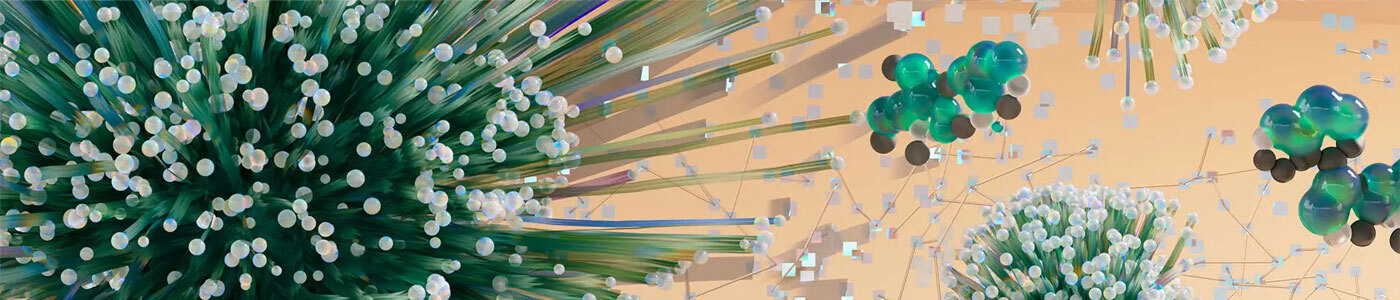
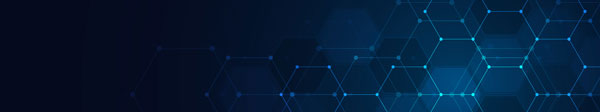

In [1]:
%reload_ext openad.notebooks.styles

<!-- Header banner -->
<div class="banner" ><div>Working with Inference Model Services</div><b>OpenAD <span>Tutorial</span></b></div>

### Table of Contents

#### Introduction
- [Introduction to OpenAD](#Introduction-to-OpenAD)
- [Introduction to BMFM Proteins](#Introduction-to-BMFM-Proteins)
    - [Overview](#Overview)
    - [1. Foundation models for Targets Discovery](#1.-Foundation-models-for-Targets-Discovery)
    - [2. Foundation Models for Biologics Discovery](#2.-Foundation-Models-for-Biologics-Discovery)
    - [3. Foundation Models for Small Molecules Discovery](#3.-Foundation-Models-for-Small-Molecules-Discovery)
- [OpenAD & Jupyter Notebook](#OpenAD-&-Jupyter-Notebook)
    - [Magic commands](#Magic-commands)
    - [Using variables](#Using-variables)

#### The Hands-on Lab
- [Activating the Services](#Activating-the-services)
- [Testing the Services](#Testing-the-services)
- [Preparation](#Preparation)
- [Your molecule working set](#Your-molecule-working-set)
    - [Adding & removing molecules](#Adding-&-removing-molecules)
    - [Inspecting your working set](#Inspecting-your-working-set)
- [Generating properties](#Generating-properties)
    - [The properties we'll generate](#The-properties-we'll-generate)
    - [Running the inference](#Running-the-inference)
- [Working with Proteins](#Working-with-Proteins)
    - [Triaging candidate molecules](#Triaging-candidate-molecules)
    - [Reviewing the result](#Reviewing-the-result)
    - [Drug Target Interaction (DTI) analysis](#Drug-Target-Interaction-(DTI)-analysis)
    - [Protein viewer](#Protein-viewer)

## Introduction to OpenAD

OpenAD is an open-source framework for molecular and materials discovery developed by IBM Research.

The OpenAD client is accessible from a command line interface, Jupyter Notebook and an API. It provides unified access to a variety of tools and AI models for literature knowledge extraction, forward and retrosynthesis prediction, generative methods and property inference. You can train models on your own data as well as visualize and filter candidate molecules.

#### Useful Links
- **Homepage**<br><a href="https://accelerate.science/projects/openad">accelerate.science/projects/openad</a>
- **GitHub**<br><a href="https://github.com/acceleratedscience/open-ad-toolkit">github.com/acceleratedscience/open-ad-toolkit</a>
- **Pip install**<br><a href="https://pypi.org/project/openad/">pypi.org/project/openad</a>
- **Documentation**<br><a href="https://acceleratedscience.github.io/openad-docs/">acceleratedscience.github.io/openad-docs</a>

#### Providing Feedback
- Feature requests, feedback and questions:<br><a href="mailto:phil.downey1@ibm.com">phil.downey1@ibm.com</a>
- Bug reports:<br><a href="https://github.com/acceleratedscience/open-ad-toolkit/issues">Create issue on GitHub</a>

#### Learn
- <a href="https://blog.accelerate.science/">OpenAD blog</a>
- <a href="https://github.com/acceleratedscience/open-ad-toolkit/tree/main/openad/notebooks">Demo Notebooks</a>
- <a href="#">Mailing list</a>

## Introduction to Bio Medical foundation Model

Learning a molecular language for protein interactions is crucial for advancing drug discovery. Foundation models, trained on diverse biomedical data like antibody-antigen interactions and small molecule-protein interactions, are transforming this field. Unlike traditional computational approaches, they widen the search scope for novel molecules and refine it to eliminate unsuitable ones, emphasizing the detailed nuances in molecular structure and dynamics.

IBM Research biomedical foundation model (BMFM) technologies leverage multi-modal data of different types, including drug-like small molecules and proteins (covering a total of more than a billion molecules), as well as single-cell RNA sequence and other biomedical data.

Our research team has a diverse range of expertise, including computational chemistry, medicinal chemistry, artificial intelligence, computational biology, physical sciences, and biomedical informatics.

Our BMFM Technologies currently cover the following three domains:
1. Foundation models for Targets Discovery
1. Foundation Models for Biologics Discovery
1. Foundation Models for Small Molecules Discovery

Our Open Source Hugging Face location for this project https://huggingface.co/ibm/biomed.omics.bl.sm.ma-ted-400m

### Overview

<img src="./media/BMFM_Technologies_for_Drug_Discovery_1_625f4be741.jpeg" width=1000 >

### 1. Foundation models for Targets Discovery

Targets discovery models learn the representation of DNA, bulk RNA, single-cell RNA expression data and other cell level signaling information for the identification of novel diagnostic and therapeutic targets, allowing tasks such as cell type annotation and classification, gene perturbation prediction, disease state prediction, splice variants prediction, promoter region, and treatment response.

<img src="./media/BMFM_1_1ce4bc0401.png" style="background-color:white;" width=1000>

### 2. Foundation Models for Biologics Discovery

Biologics discovery models focus on biologic therapeutics discovery, with the goal of leveraging large-scale representations of protein sequences, structures, and dynamics for diverse downstream tasks associated with multiple biologics modalities. These models produce unified representations of biological molecular entities, integrating data such as protein sequences, protein complex structures, and protein-protein complex binding free energies into a single framework. These models can serve as the basis for diverse downstream tasks in therapeutic design, including candidate generation and assessment, across antibody, TCR, vaccine, and other modalities.

<img src="./media/BMFM_2_ae4ec386c4.png" style="background-color:white;" width=1000>

### 3. Foundation Models for Small Molecules Discovery

Small molecules models can address a wide variety of downstream predictive and generative tasks. These models are trained on multiple representations of small molecules data to learn rich low-dimensional representations of biochemical entities relevant to drug discovery, allowing tasks such as property and affinity prediction, multi-model late fusion prediction, and scaffold-based generation. Predictive models are transformer models pretrained on multiple views (i.e., modalities) of small molecule data and learn rich latent representations by maximizing mutual information across different views of molecules. Generative models learn by driving input molecules to output mutant molecules with a cognate property embedding of the mutant via diffusive denoising networks. Given a set of desired properties and a desired template molecule (3D-strcutures), a set of designer molecules (3D-strcutures) can be obtained.

<img src="./media/BMFM_3_6ef1496dbf.png" style="background-color:white;" width=1000>

## OpenAD &amp; Jupyter Notebook

### Magic commands

"Magic commands" let you access the OpenAD toolkit from within your Notebooks. To use them, you have 2 options.

1. **Default mode:** `%openad`<br>
This is the recommended mode, which will display your data and warnings visually in your Notebook.<br>
Whenever displaying data, follow-up commands are displayed that allow you to further process the data, eg. `result open`, `result edit`, `result copy`<br><br>
Example usage:
    
        %openad display data 'sample.csv'

<br>

2. **Data mode:** `%openadd`<br>
This mode skips visualisation and returns your results in a dataframe or list format that can then be used programatically in functions or flows in your Notebook. This is useful for prebuilt Notebook process flows.<br><br>
Example usage:

        my_data = %openadd display data 'sample.csv'

    This is essentially shorthand for:
    
        %openad display data 'sample.csv'
        my_data = %openad result as dataframe

<br>

Please note: Comments should be placed on a separate line from a magic command.

### Using variables

Magic commands can access variables from your Notebook, using the `{variable_name}` syntax.

    external_file = '~/openad_notebooks/examples/base_molecules.csv'
    new_filename = 'imported_data.csv'
    %openad import from '{molecules_file}' to '{new_filename}'

##
<br><br><br>
<div class="banner">The Hands-on Lab</div>

### Table of contents

- [Activating the Services](#Activating-the-services)
- [Testing the Services](#Testing-the-services)
- [Preparation](#Preparation)
- [Your molecule working set](#Your-molecule-working-set)
    - [Adding & removing molecules](#Adding-&-removing-molecules)
    - [Inspecting your working set](#Inspecting-your-working-set)
- [Generating properties](#Generating-properties)
    - [The properties we'll generate](#The-properties-we'll-generate)
    - [Running the inference](#Running-the-inference)
- [Working with Proteins](#Working-with-Proteins)
    - [Triaging candidate molecules](#Triaging-candidate-molecules)
    - [Reviewing the result](#Reviewing-the-result)
    - [Drug Target Interaction (DTI) analysis](#Drug-Target-Interaction-(DTI)-analysis)
    - [Protein viewer](#Protein-viewer)

## Activating the services

#### Define service endpoints
You should have the ***Small Molecules*** and ***Protein Inferences*** endpoints set as environment variables.

In case the model services were already created, uncatalog them (see below) and add them again with the new URLs.

### ATTENTION:  
### You can skip this section if your models bmfm_sm and bmfm_pm are already cataloged.

It you are not using the compose demonstration or environment that pre-populates the environment vsriables for the URLS and do not have the OpenAD_service hosted models catalog in your envirnment you can manually catalog your models with the required Urls using :

`%openad catalog model service from remote 'Myurl1' as bmfm_pm`<br>
`%openad catalog model service from remote 'Myurl2' as bmfm_sm`

#### To check if the model services exist run `%openad model service status`


### Catalogging your models

In [ ]:
import os

if os.getenv("OPENAD-MAMMAL") and os.getenv("OPENAD-SM"):
    protein_url = os.getenv("OPENAD-MAMMAL")
    sm_url = os.getenv("OPENAD-SM")
else:
    print(
        "ATTENTION: Make sure you have bmfm_pm and bmfm_sm cataloged as models\
 do not proceed further until doing so, Catalog them and move to Testing Services"
    )

#### Uncatalog existing model services

In [ ]:
if os.getenv("OPENAD-MAMMAL") and os.getenv("OPENAD-SM"):
    %openad uncatalog model service bmfm_pm
    %openad uncatalog model service bmfm_sm

#### Catalog the new services

In [ ]:
if os.getenv("OPENAD-MAMMAL") and os.getenv("OPENAD-SM"):
    %openad catalog model service from remote '{protein_url}' as bmfm_pm
    %openad catalog model service from remote '{sm_url}' as bmfm_sm

## Testing the services

#### Checking the status

When checking the Model Services status, they should show as `connected`.

In [ ]:
%openadd model service status

#### Testing the services
The different model services are name-spaced with the service name as prefix to each command.

In [ ]:
# Get the help for a service
%openad bmfm_sm ?

In [ ]:
# Test the 'Small Molecule Model' service
%openad bmfm_sm get molecule property LIPOPHILICITY for CC(C)C(CO)NC1=NC(=C2C(=N1)N(C=N2)C(C)C)NC3=CC(=C(C=C3)C(=O)O)Cl merge with mols
%openad show molecules

In [ ]:
# Test the 'Protein Molecule' service
%openad bmfm_pm get protein property sol for 'TTYADFIASGRTGRRNAIHD'

## Preparation

Let's define the molecules we'll be working with in this demo.

In [ ]:
# The drug small molecules
drug_smiles = [
    "Ruboxistaurin",
    "CC(C)C(CO)NC1=NC(=C2C(=N1)N(C=N2)C(C)C)NC3=CC(=C(C=C3)C(=O)O)Cl",
    "flavopiridol",
    "fasudil",
    "Quercitin",
    "h89",
    "Purvalanol",
    "gefitinib",
    "PD173955",
    "C1=CC=C2C(=C1)C(=C(N2)O)C3=C(C4=CC=CC=C4N3)N=O",
    "lapatinib",
    "LY294002",
    "PP2",
]

# The proteins targets
proteins = [
    "SVERIYQKKTQLEHILLRPDTYIGSVELVTQQMWVYDEDVGINYREVTFVPGLYKIFDEILVNAADNKQRDPKMSCIRVTIDPENNLISIWNNGKGIPVVEHKVEKMYVPALIFGQLLTSSNYDDDE\
KKVTGGRNGYGAKLCNIFSTKFTVETASREYKKMFKQTWMDNMGRAGEMELKPFNGEDYTCITFQPDLSKFKMQSLDKDIVALMVRRAYDIAGSTKDVKVFLNGNKLPVKGFRSYVDMYLKDKLDETGNSLKVIHEQVNH\
RWEVCLTMSEKGFQQISFVNSIATSKGGRHVDYVADQIVTKLVDVVKKKNKGGVAVKAHQVKNHMWIFVNALIENPTFDSQTKENMTLQPKSFGSTCQLSEKFIKAAIGCGIVESILNWVKFKAQVQLNKKCS",
    "TTYADFIASGRTGRRNAIHD",
    "KVTMNDFDYLKLLGKGTFGKVILVREKATGRYYAMKILRKEVIIAKDEVAHTVTESRVLQNTRHPFLTALKYAFQTHDRLCFVMEYANGGELFFHLSRERVFTEERARFYGAEIVSA\
LEYLHSRDVVYRDIKLENLMLDKDGHIKITDFGLCKEGISDGATMKTFCGTPEYLAPEVLEDNDYGRAVDWWGLGVVMYEMMCGRLPFYNQDHERLFELILMEEIRFPRTLSPEAKSLLAGLLKKDPKQRLGGGPSDAKEVM\
EHRFFLSINWQDVVQKKLLPPFKPQVTSEVDTRYFDDEFTAQSITITPPDRYDSLGLLELDQRTHFPQFDYSASIR",
    "GAMDPKVTMNDFDYLKLLGKGTFGKVILVREKATGRYYAMKILRKEVIIAKDEVAHTVTESRVLQNTRHPFLTALKYAFQTHDRLCFVMEYANGGELFFHLSRERVFTEERARFYGAEIVSALEYLHSRDVVYRDIKLENL\
MLDKDGHIKITDFGLCKEGISDGATMKTFCGTPEYLAPEVLEDNDYGRAVDWWGLGVVMYEMMCGRLPFYNQDHERLFELILMEEIRFPRTLSPEAKSLLAGLLKKDPKQRLGGGPSDAKEVMEHRFFLSINWQDVVQKKLLP\
PFKPQVTSEVDTRYFDDEFTAQSITITPPDRYDSLGLLELDQREEQEMFEDFDYIADW",
]

## Your molecule working set

Your "molecule working set" is an in-memory list of molecules that will be the subject of your calculations and manipulations, using the `@mols` pointer.

### Adding & removing molecules
#### Clearing the working set
<i class="note">**Note:** The `force` clause skips the confirmation step.</i>

In [ ]:
# Clear the working set
%openad clear molecules force

#### Adding molecules in batch
Molecules can be added individually with `add mol` or in batch using `load mols`.

In [ ]:
# See the help for loading molecules from a dataframe
%openad load molecules|mols from dataframe ?

In [ ]:
# See the help for loading molecules from a file
%openad load molecules|mols from file ?

#### Adding individual molecules

For this demo, we'll be adding our molecules one-by-one using their various identifers defined above. By default, their details will be retrieved from PubChem.

<i class="note">**Note:** Duplicates are skipped, as will be apparent from the log.</i>

In [ ]:
# Add list of molecules to your working set
for i in drug_smiles:
    %openad add molecule {i} force

### Inspecting your working set

#### Viewing your molecules
First we'll open your molecules working set, then we'll inspect an individual molecule by clicking the 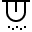 (details) icon.

<i class="note">**Note:** You can open the interface in a separate browser window by clicking the 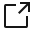 (open) icon in the top right hand corner.</i>

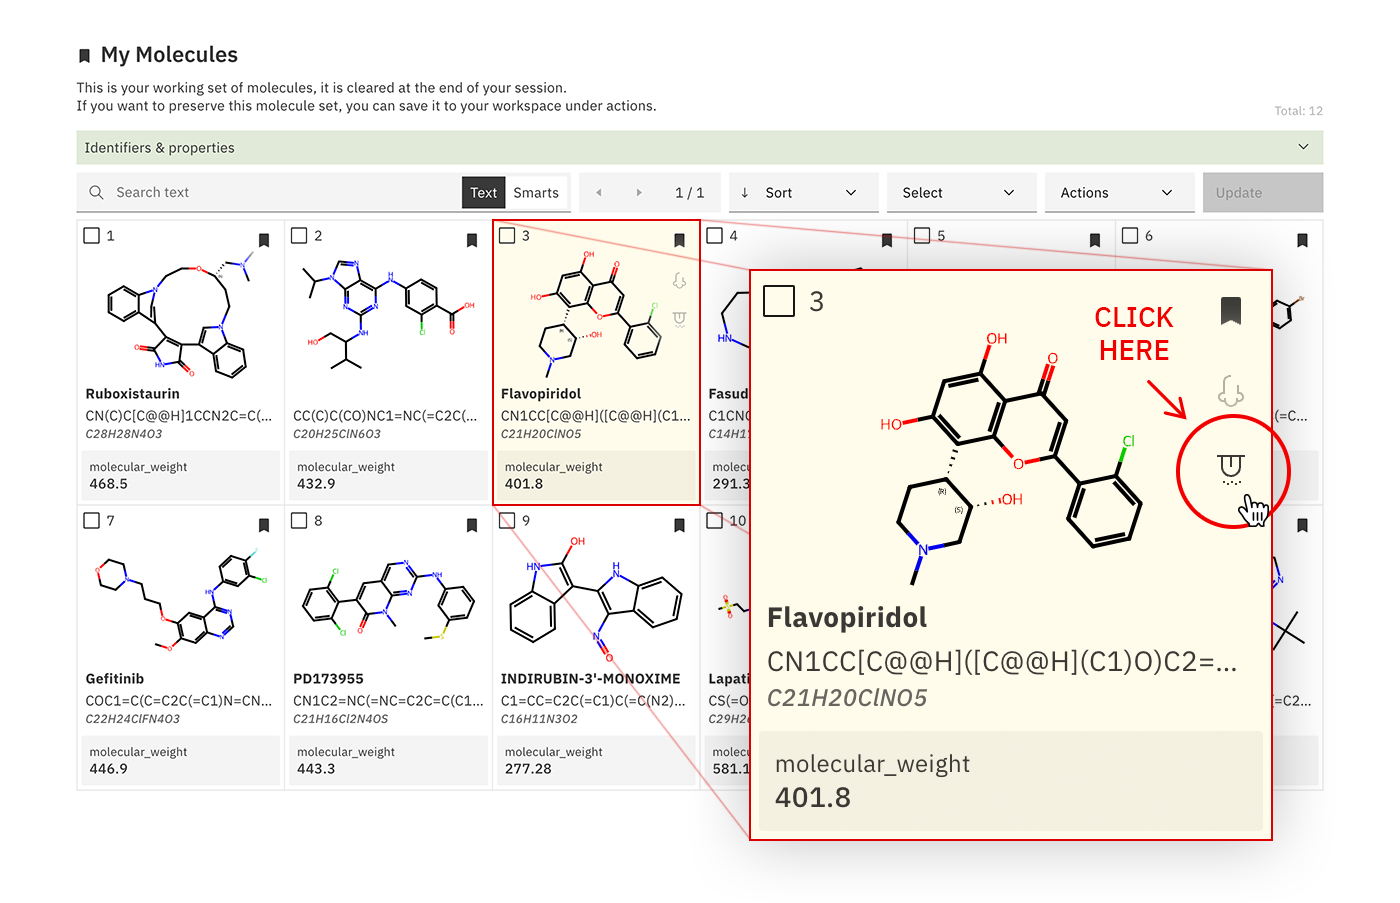

In [ ]:
# View your molecules working set
%openad show mols

In [ ]:
from time import sleep

sleep(5)
display(Markdown("### Have you reviewed your Molecule Working Set ?"))

#### Listing your molecules

This lets us quickly see our stored molecules with the options of storing them in a dataframe.

In [ ]:
# List your molecules working set
%openad list mols

## Generating properties

We'll run our first inference using the ***Foundation Models for Small Molecules Discovery*** to calculate a set of properties.

To see what properties are available from our service, we can run the command's help:

In [ ]:
%openad bmfm_sm get molecule property ?

### The properties we'll Predict using the Small Molecule Inference

These endpoints were generated with:
[biomed.omics.bl.sm.ma-ted-400m](https://huggingface.co/ibm/biomed.omics.bl.sm.ma-ted-400m)

<body>

1. ***BACE*** - MoleculeNet: Inhibition of human beta secretase 1

1. ***ESOL*** - MoleculeNet: Solubility

1. ***LIPOPHILICITY*** - MoleculeNet: Octonol/water distribution coeffficient

1. ***TOX21*** - MoleculeNet: Toxicity against set of targets

</body>

In [ ]:
%openad model service status

### Running the inference

Rather than re-specifying our list of molecules, we can refer to the molecules in our working set using the `@mols` pointer. The `merge with molecules` clause then merges the results directly into the working set.

In [ ]:
%openad bmfm_sm get molecule property [ BACE, ESOL, LIPOPHILICITY,   TOX21 ] for @mols merge with molecules

Now when you inspect any of the molecules from your working set, you'll see the newly calculated properties listed as first ones in the list.

In [ ]:
%openad show molecule Ruboxistaurin

## Working with Proteins

In this example we will:
1. Extract the molecules from our working set
1. Place their SMILES in a list
1. Retrieve each molecule's `LIPOPHILICITY` property from what we generated in the example above
1. Retrieve each molecule's `molecular weight` from OpenAD (using PubChem data)
1. Remove any molecules that don't meet our criteria using an `if` statement
1. Run a DTI analysis for each molecule against our list of proteins that we defined earlier.

<div class="note" style="text-decoration: italic">
<b>Notes:</b><br>
- You can open the interface in a separate browser window by clicking the 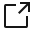 (open) icon in the top right hand corner.<br>
- In the molecule viewer, you can click the 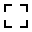 (full screen) icon to enlarge the 3D molecule view.
</div>

### Triaging candidate molecules

In [ ]:
# Store your working set molecules in a variable
mols = %openadd list molecules

for i, x in enumerate(mols["canonical_smiles"].to_list()):
    # Retrieve the LIPOPHILICITY property (which was generated earlier)
    LIPOPHILICITY = %openadd @{x}>>LIPOPHILICITY

    # Retrieve the molecular weight property (default data from PubChem)
    molecular_weight = %openadd @{x}>>molecular_weight

    # Store the molecule's name
    name = %openadd @'{x}'>>name

    # Perform arbitary filtering
    if float(molecular_weight) > 4.40 and float(LIPOPHILICITY) > 2.0:
        # Display the molecule's status
        display(
            Markdown(
                f"#### {i + 1}. {name}:<br> **{x}**<br><span style='background:#090;color:#fff;padding:5px 10px;margin-top:10px;display:inline-block'>VALID</span>"
            )
        )

    else:
        # Display the molecule's status
        display(
            Markdown(
                f"#### {i + 1}. {name}:<br> **{x}**<br><span style='background:#d00;color:#fff;padding:5px 10px;margin-top:10px;display:inline-block'>REMOVED</span>"
            )
        )

        # Remove any molecule that doesn't meet the criteria from our molecule working set
        %openad remove molecule {x} force

display(Markdown("<br><br><br>"))

### Reviewing the result

Notice how the molecules that didn't meet our selection criteria in the previous step have been removed, and are no longer in your molecules working set.

In [ ]:
%openad show molecules

### Drug Target Interaction (DTI) analysis

Accurate prediction of drug-target binding affinity is essential in the early stages of drug discovery. This model provides a scalable prediction utilizing [ibm/biomed.omics.bl.sm-ted-400](https://huggingface.co/ibm/biomed.omics.bl.sm.ma-ted-400m), a multi-domain model trained on over 2 billion samples. It has been fine-tuned to predict binding affinities using pKd, the negative logarithm of the dissociation constant, which reflects the strength of the interaction between a small molecule (drug) and a protein (target). The expected inputs for the model are the amino acid sequence of the target and the SMILES representation of the drug.

In [ ]:
results = []
i = 0
# Store your working set molecules in a variable
mols = %openadd list molecules

for x in mols["canonical_smiles"].to_list():
    result = %openadd bmfm_pm get protein property dti for {proteins} using (drug_smiles='{x}')
    # Store the molecule's name
    name = %openadd @'{x}'>>name
    display(Markdown(f"#### {i + 1}. {name}\nDrug target interaction indicator:<br> ***{x}***"))
    result
    i += 1
results

### Protein viewer

Let's finish by generating the solubility the proteins in our list, and then displaying them using the protein viewer

#### Protein Solubility Prediction
Protein solubility is a critical factor in both pharmaceutical research and production processes, as it can significantly impact the quality and function of a protein. This model provides a protein solubility prediction using ibm/biomed.omics.bl.sm-ted-400, a multi-domain model trained on over 2 billion samples. It has been fine-tuned to predict protein solubility based solely on the amino acid sequence.

In [ ]:
for i, FASTA in enumerate(proteins):
    # Display protein identifier
    display(Markdown(f"<br><br>\n### Protein #{i + 1}\n{FASTA}"))

    # Visualize the protein and its attributes,
    # using data from rcsb.org
    %openad show protein '{FASTA}'

    # Inference solubility

    result = %openadd bmfm_pm get protein property sol for {FASTA}
    display(Markdown(f"#### Solubility Result : {result['result'].to_list()[0]}"))